# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '6_October'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

# Reset index
df_bottom_20.index = np.arange(1, len(df_bottom_20) + 1)
df_top_20.index = np.arange(1, len(df_top_20) + 1)

# Round wageredamt and profit to 2 decimal places
df_bottom_20['wageredamt'] = df_bottom_20['wageredamt'].round(1)
df_bottom_20['profit'] = df_bottom_20['profit'].round(1)
df_bottom_20['percent_return'] = df_bottom_20['percent_return'].round(1)
df_top_20['wageredamt'] = df_top_20['wageredamt'].round(1)
df_top_20['profit'] = df_top_20['profit'].round(1)
df_top_20['percent_return'] = df_top_20['percent_return'].round(1)

In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_bottom_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_bottom_20 = pd.concat([df_bottom_20, dummy_variables], axis=1).reset_index(drop=True)

# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_top_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_top_20 = pd.concat([df_top_20, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])


In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df_bottom_20['time_diff'] = df_bottom_20.groupby(['playerkey', 'session_time'])['start_time'].diff()
df_top_20['time_diff'] = df_top_20.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df_bottom_20['time_diff'] = df_bottom_20['time_diff'].dt.total_seconds().fillna(0)
df_top_20['time_diff'] = df_top_20['time_diff'].dt.total_seconds().fillna(0)


## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in bottom 20%:", len(df_bottom_20['playerkey'].unique()))
print("Number of gamblers in top 20%:", len(df_top_20['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in bottom 20%:", len(df_bottom_20['visit'].unique()))
print("Number of unique visits in top 20%:", len(df_top_20['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in bottom 20%:", len(df_bottom_20['session_time'].unique()))
print("Number of unique sessions in top 20%:", len(df_top_20['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in bottom 20%:", len(df_bottom_20['session_machine'].unique()))
print("Number of unique sessions on session_machine in top 20%:", len(df_top_20['session_machine'].unique()))




Number of gamblers in bottom 20%: 1156
Number of gamblers in top 20%: 1175
--------------------------------------------------
Number of unique visits in bottom 20%: 3
Number of unique visits in top 20%: 11
--------------------------------------------------
Number of unique sessions in bottom 20%: 2
Number of unique sessions in top 20%: 10
--------------------------------------------------
Number of unique sessions on session_machine in bottom 20%: 24
Number of unique sessions on session_machine in top 20%: 2855


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'visit')
df_top_20 = pf.consecutive_wins(df_top_20, 'visit')


In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
        #2ws  #3ws  #4ws
visit                   
1      312.0  47.0  21.0
2        5.0   1.0   0.0
3        1.0   0.0   0.0
--------------------------------------------------
Top 20
          #2ws    #3ws   #4ws
visit                        
1      13315.0  2495.0  736.0
2       8824.0  1586.0  544.0
3       4537.0   852.0  245.0
4       1803.0   314.0  125.0
5        741.0   122.0   33.0
6        292.0    48.0   20.0
7         73.0    25.0   17.0
8         73.0    23.0   15.0
9         14.0     2.0    2.0
10        60.0     9.0    1.0
11         8.0     1.0    0.0


In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df_bottom_20_s = pf.consecutive_wins(df_bottom_20, 'session_time')
df_top_20_s = pf.consecutive_wins(df_top_20, 'session_time')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
               #2ws  #3ws  #4ws
session_time                   
1             311.0  44.0  20.0
2               8.0   3.0   1.0
--------------------------------------------------
Top 20
                 #2ws    #3ws    #4ws
session_time                         
1             17074.0  3199.0  1088.0
2              7220.0  1280.0   382.0
3              3359.0   577.0   160.0
4              1271.0   248.0    72.0
5               507.0   100.0    23.0
6               232.0    41.0    11.0
7                33.0     9.0     0.0
8                24.0     7.0     1.0
9                18.0     8.0     0.0
10                3.0     1.0     0.0


### Rank Differences

Number of unique players in bottom 20%:
rank
1.0    1055
2.0      26
3.0      10
6.0      65
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
rank
1.0    784
2.0     77
3.0     85
6.0    229
Name: playerkey, dtype: int64
--------------------------------------------------


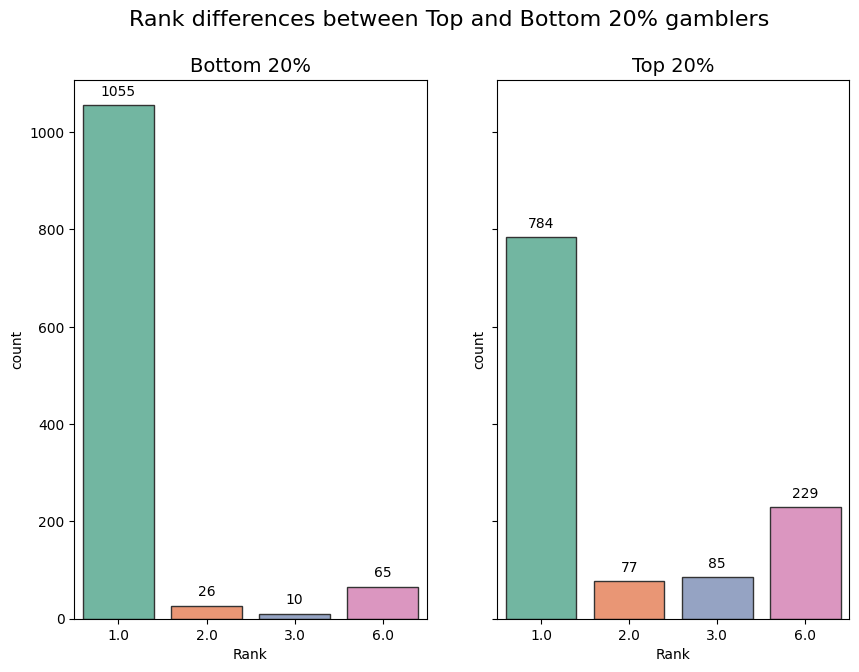

In [10]:
# For every unique rank, print the number of unique players
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('rank', df_top_20, df_bottom_20, title='Rank', figsize=(10, 7))

### Gender Differences

Number of unique players in bottom 20%:
gender
F    562
M    594
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    566
M    609
Name: playerkey, dtype: int64
--------------------------------------------------


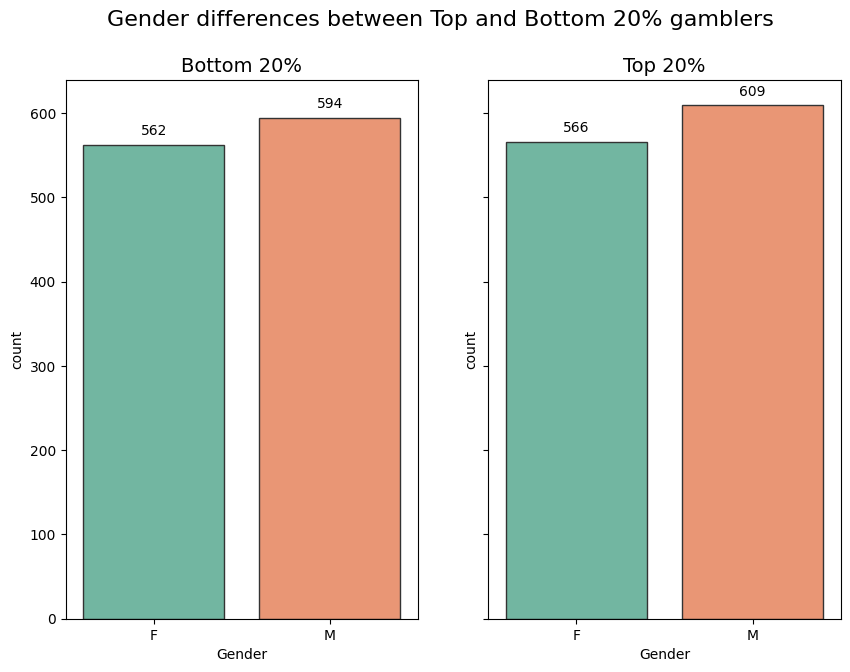

In [11]:
# Gender differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('gender', df_top_20, df_bottom_20, title='Gender', figsize=(10, 7))

### Age Differences

In [12]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

Number of unique players in bottom 20%:
age_range
18-24     32
25-40    414
41-55    375
56-75    312
76+       23
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24      8
25-40    207
41-55    402
56-75    518
76+       40
Name: playerkey, dtype: int64
--------------------------------------------------


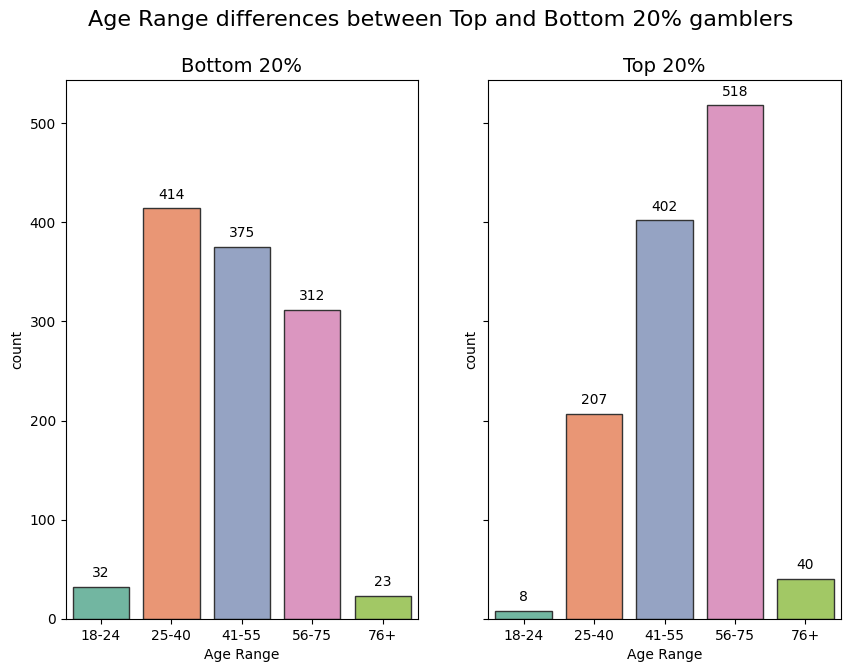

In [13]:
# Age range differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_range', df_top_20, df_bottom_20, title='Age Range', figsize=(10, 7))

Number of unique players in bottom 20%:
age_gen
Gen Z            32
Millenials      414
Gen X           375
Baby Boomers    312
Silent           23
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z             8
Millenials      207
Gen X           402
Baby Boomers    518
Silent           40
Name: playerkey, dtype: int64
--------------------------------------------------


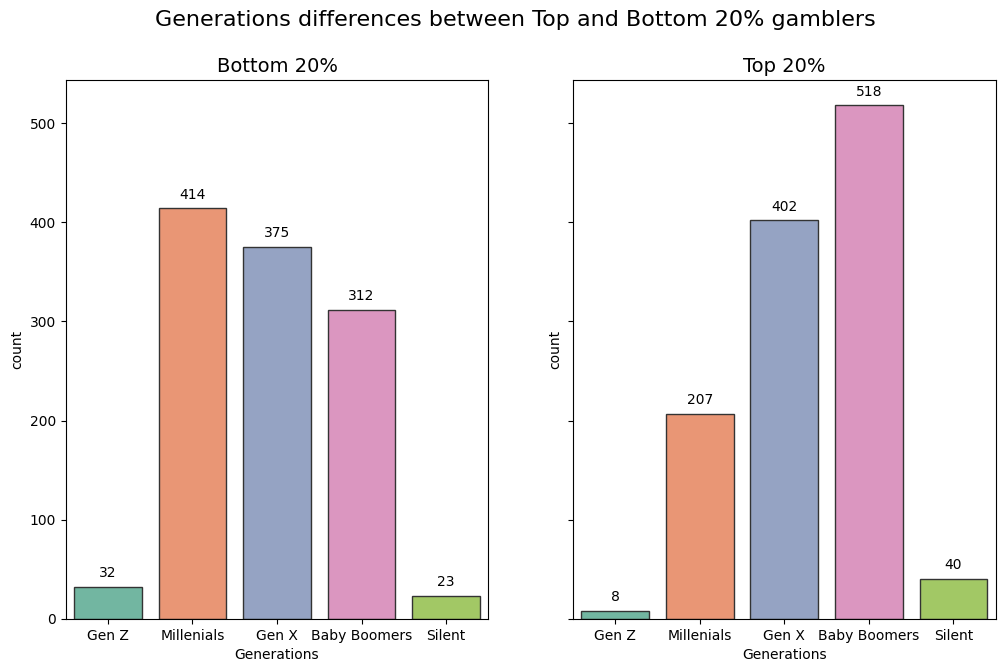

In [14]:
# Age generation differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_gen', df_top_20, df_bottom_20, title='Generations', figsize=(12, 7))


Male age differences in bottom 20%:
age_range
18-24     15
25-40    227
41-55    205
56-75    131
76+       16
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24     17
25-40    187
41-55    170
56-75    181
76+        7
Name: playerkey, dtype: int64


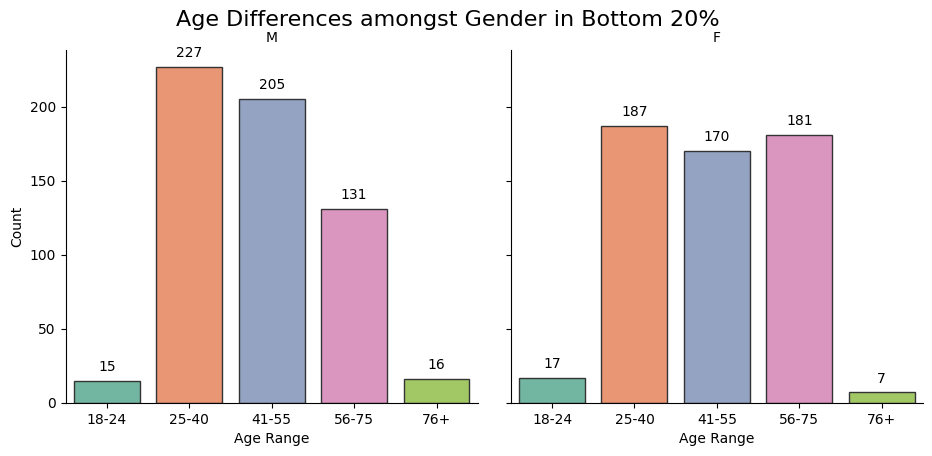

In [15]:
# Age range of male gamblers in bottom 20%
print("Male age differences in bottom 20%:")
print(df_bottom_20[df_bottom_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in bottom 20%
print('Female age differences in bottom 20%:')
print(df_bottom_20[df_bottom_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df_bottom_20, 'Bottom 20%', figsize=(10, 5))


Male age differences in top 20%:
age_range
18-24      3
25-40    120
41-55    225
56-75    244
76+       17
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24      5
25-40     87
41-55    177
56-75    274
76+       23
Name: playerkey, dtype: int64
--------------------------------------------------


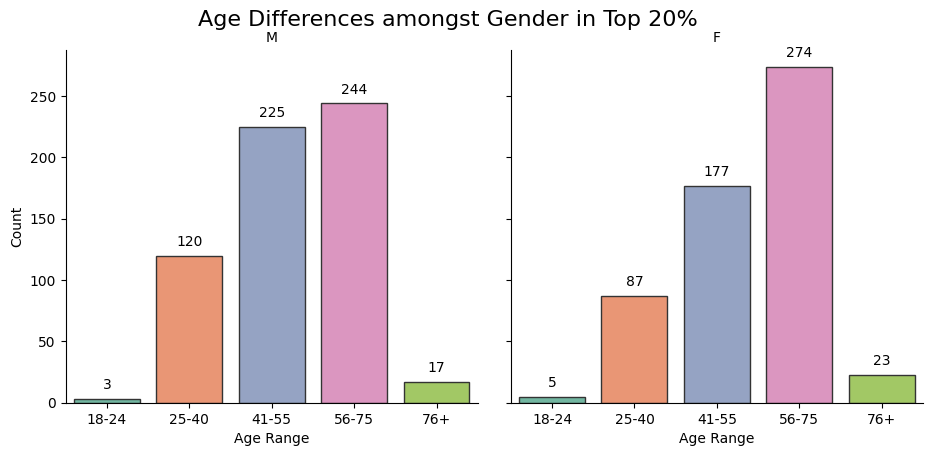

In [16]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot gender differences
pf.plot_gender_diff(df_top_20, 'Top 20%', figsize=(10, 5))

### Increse and Decrease of SlotDenomination and Bet

In [17]:
# Lets cound the number of times a player increase slot denominations
players_increase_slot_t20 = cf.count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = cf.count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_t20 = cf.count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = cf.count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 882
Count of times each player increase_slotdeno : {20: 189, 224: 15, 646: 2, 865: 2, 1008: 1, 1069: 1, 1166: 11, 1233: 42, 1246: 1, 1321: 207, 1403: 113, 1408: 2, 1442: 3, 1546: 10, 1959: 7, 2029: 2, 2070: 1, 2073: 1, 2099: 1, 2331: 4, 2710: 2, 2858: 7, 3127: 18, 3260: 2, 3555: 3, 3634: 25, 3653: 6, 3677: 3, 3726: 1, 4252: 1, 4265: 5, 4304: 12, 4555: 4, 4970: 5, 5113: 10, 5147: 4, 5841: 74, 5879: 28, 5969: 13, 6191: 38, 6234: 3, 6255: 1902, 6271: 13, 6365: 21, 6527: 2, 6695: 4, 6738: 9, 6829: 1, 7195: 1, 7337: 2, 7420: 1, 7689: 5, 7695: 6, 7933: 3, 7967: 4, 8005: 3, 8233: 262, 8412: 3, 8465: 2, 8827: 3, 8978: 19, 9011: 4, 9031: 4, 9222: 2, 9510: 9, 9788: 327, 10119: 2, 10248: 5, 10348: 1, 10349: 2, 10598: 1, 10738: 249, 11309: 3, 11427: 6, 11474: 1, 11526: 1, 11584: 2, 11821: 2, 11947: 1, 12093: 9, 12192: 2, 12277: 22, 12356: 7, 12516: 7, 12692: 2, 12721: 177, 13312: 3, 13435: 83, 13910: 7, 14128: 1, 14443: 2, 14778: 1, 14868: 6, 15389: 36, 156

In [18]:
# Lets do the same but for bottom 20%
players_increase_slot_b20 = cf.count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_b20 = cf.count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_b20 = cf.count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_b20 = cf.count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 107
Count of times each player increase_slotdeno : {683: 1, 2082: 1, 9141: 1, 11125: 2, 13364: 1, 15868: 1, 20116: 1, 23443: 1, 23929: 2, 34540: 1, 35343: 1, 35447: 1, 39281: 1, 41743: 1, 41997: 2, 42279: 1, 42499: 1, 42527: 1, 42599: 1, 42680: 1, 42818: 1, 43000: 1, 43241: 1, 43274: 1, 43322: 1, 43342: 2, 43343: 1, 43399: 1, 43451: 1, 43475: 1, 43537: 1, 43590: 1, 43647: 1, 43691: 1, 43706: 1, 43732: 1, 43865: 1, 43982: 1, 44014: 3, 44073: 1, 44216: 1, 44247: 1, 44434: 1, 44454: 1, 44499: 2, 44532: 1, 44602: 2, 44673: 1, 44747: 1, 44756: 1, 44767: 1, 44776: 1, 44864: 1, 44870: 1, 44881: 1, 44947: 1, 45100: 1, 45126: 3, 45128: 1, 45187: 1, 45309: 1, 45333: 1, 45385: 1, 45418: 1, 45484: 1, 45556: 1, 45601: 1, 45615: 1, 45681: 3, 45760: 1, 45821: 1, 45917: 1, 45935: 1, 46031: 1, 46075: 1, 46125: 1, 46147: 1, 46148: 1, 46193: 1, 46250: 2, 46280: 1, 46349: 2, 46357: 1, 46461: 1, 46479: 1, 46595: 1, 46638: 1, 46693: 1, 46853: 1, 46924: 1, 46953: 1, 4

### Wealth Differences
#### General

In [19]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_bottom_20['depletion_rate'] = df_bottom_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)
df_top_20['depletion_rate'] = df_top_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


Total amount won or lost by all players in bottom 20%:
-9676.328
Average amount won or lost by each player in bottom 20%:
-8.37
-------------------------------------------------------
Total amount won or lost by all players in top 20%:
-6481.508
Average amount won or lost by each player in top 20%:
-5.52


Text(0.5, 0, 'Ending Balance')

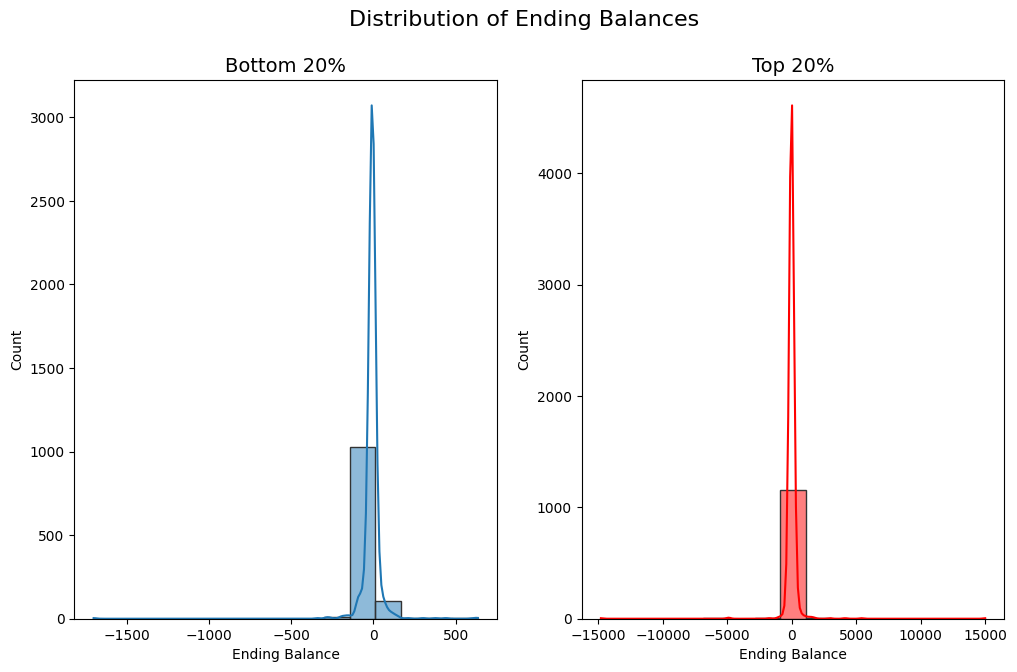

In [20]:
# Total amoun lost or won by all players in bottom 20%
# Group by 'playerkey'
grouped_b = df_bottom_20.groupby('playerkey')

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Calculate the total amount won or lost by all players
b_amount_won_lost_total = grouped_b['playercashableamt'].last().sum() - grouped_b['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
b_amount_won_lost_avg = b_amount_won_lost_total / len(grouped_b)

# Total amoun lost or won by all players in top 20%
# Group by 'playerkey'
grouped_t = df_top_20.groupby('playerkey')

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Calculate the total amount won or lost by all players
t_amount_won_lost_total = grouped_t['playercashableamt'].last().sum() - grouped_t['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
t_amount_won_lost_avg = t_amount_won_lost_total / len(grouped_t)

# Prin Results
print('Total amount won or lost by all players in bottom 20%:')
print(b_amount_won_lost_total)
print('Average amount won or lost by each player in bottom 20%:')
print(round(b_amount_won_lost_avg, 2))
print('-------------------------------------------------------')
print('Total amount won or lost by all players in top 20%:')
print(t_amount_won_lost_total)
print('Average amount won or lost by each player in top 20%:')
print(round(t_amount_won_lost_avg, 2))

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Set Title
fig.suptitle('Distribution of Ending Balances', fontsize=16)
# Plot histogram of amount won or lost by all players in bottom 20%
sns.histplot(b_amount_won_lost_each, ax=ax[0], bins=15, kde=True, edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Ending Balance')

# Plot histogram of amount won or lost by all players in top 20%
sns.histplot(t_amount_won_lost_each, ax=ax[1], bins=15, kde=True, edgecolor=".2", color='red')
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Ending Balance')

#### Per Visit

In [21]:
# Create dataframe
df_all_v = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', print_results=False)

In [22]:
# Simultaneous Play
df_b20_sim_v = pf.simultaneous_play(40000, df_bottom_20, 'visit')
df_t20_sim_v = pf.simultaneous_play(40000, df_top_20, 'visit')

# Concat the two dataframes
df_sim_v = pd.concat([df_b20_sim_v, df_t20_sim_v]).reset_index()

print(df_sim_v)
# Remove repeated instances
df_sim_no_repeat_v = df_sim_v.drop_duplicates(subset=['visit', 'playerkey'])

print(len(df_sim_no_repeat_v))

     index  visit  playerkey
0        0      1      43207
1        1      1      43537
2        2      1      44776
3        3      1      44937
4        4      1      45404
..     ...    ...        ...
406    399      6       6255
407    400      6      39286
408    401      6      45045
409    402      7      41643
410    403     11       1008

[411 rows x 3 columns]
239


In [23]:
# Merge Sim play
df_all_v['sim_play'] = df_all_v[['playerkey', 'visit']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_v[['playerkey', 'visit']].values)), axis=1)

# Eliimante discrepancies
# Print number of unique players
print("Number of unique players in df_all_v: ", df_all_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy = df_all_v[df_all_v.isna().any(axis=1)]['playerkey'].unique()

# Print number of players with NaN values
print("Number of players with NaN values: ", len(list_discrepancy))

# Remove discrepancies
df_all_v = df_all_v[~df_all_v['playerkey'].isin(list_discrepancy)]

print(df_all_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']


df_all_v = df_all_v.reindex(columns=desired_order)

Number of unique players in df_all_v:  2331
Number of players with NaN values:  65
Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', 'ave_time_p

##### Distribution Ending Balances

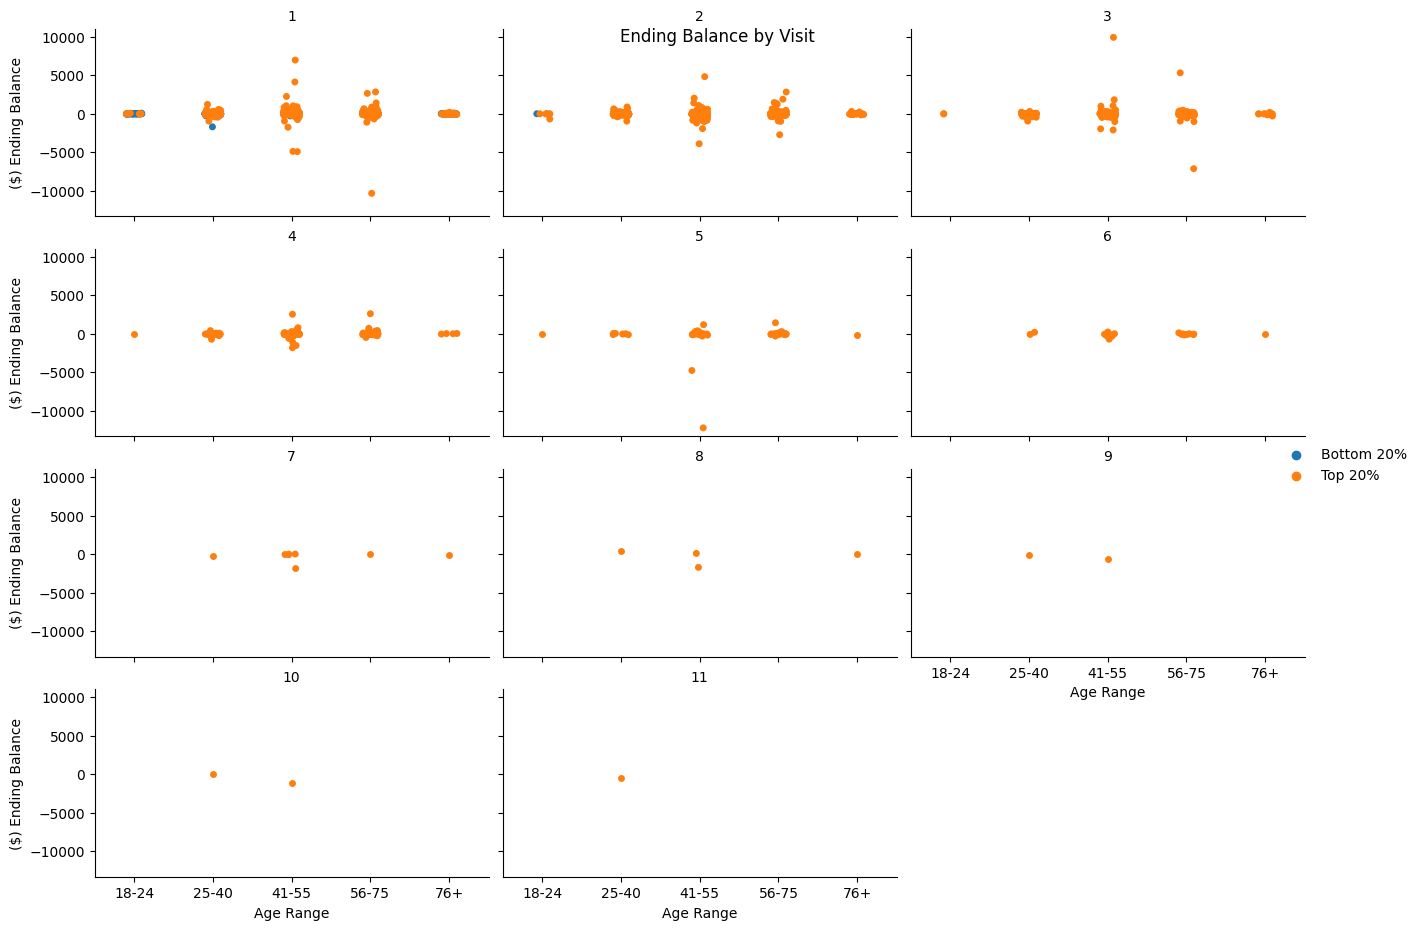

In [24]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


##### Overall Gains/Loses

In [25]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -5815.634766
        Top 20%      -20251.150391
M       Bottom 20%    -4396.676758
        Top 20%      -25070.759766
Name: ending_balance, dtype: float32
-------------------------------------------------------
visit  gender  percentile
1      F       Bottom 20%    -5904.561523
               Top 20%       -3598.491455
       M       Bottom 20%    -4241.174316
               Top 20%        2678.142090
2      F       Bottom 20%       88.926758
               Top 20%       -4414.482910
       M       Bottom 20%     -152.650696
               Top 20%       -7109.528809
3      F       Bottom 20%        0.000000
               Top 20%       -2653.500732
       M       Bottom 20%       -2.851562
               Top 20%       -6938.394043
4      F       Top 20%         408.087280
       M       Top 20%       -1254.832764
5      F       Top 20%       -3122.692383
       M       Top 20%      -11540.687500
6      F       Top 20%     

In [26]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, rank, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
        playerkey  rank age_range gender  ending_balance
23511        1233   3.0     41-55      M        -12201.0
727573      42613   3.0     56-75      M        -10332.0
[1233, 42613]
Without Outliers present:
                   ending_balance
gender percentile                
F      Bottom 20%    -5815.634766
       Top 20%      -20251.150391
M      Bottom 20%    -4396.676758
       Top 20%      -15792.320312
-----------------------------------------------

#### Per Session

In [27]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', print_results=False)

In [28]:
# Simultaneous Play
df_b20_sim_s = pf.simultaneous_play(40000, df_bottom_20, 'session_time')
df_t20_sim_s = pf.simultaneous_play(40000, df_top_20, 'session_time')

# Concat the two dataframes
df_sim_s = pd.concat([df_b20_sim_s, df_t20_sim_s]).reset_index()

print(df_sim_s)
# Remove repeated instances
df_sim_no_repeat_s = df_sim_s.drop_duplicates(subset=['session_time', 'playerkey'])

print(df_sim_no_repeat_s)

     index  session_time  playerkey
0        0             1      43207
1        1             1      43537
2        2             1      44776
3        3             1      44937
4        4             1      45404
..     ...           ...        ...
456    449             6      44607
457    450             6      46310
458    451             7      44432
459    452             7      45448
460    453             7      46310

[461 rows x 3 columns]
     index  session_time  playerkey
0        0             1      43207
1        1             1      43537
2        2             1      44776
3        3             1      44937
4        4             1      45404
..     ...           ...        ...
455    448             6      44607
457    450             6      46310
458    451             7      44432
459    452             7      45448
460    453             7      46310

[270 rows x 3 columns]


In [29]:
# Merge Sim play
df_all_s['sim_play'] = df_all_s[['playerkey', 'session_time']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_s[['playerkey', 'session_time']].values)), axis=1)

# Eliminate discrepancies
df_all_s = df_all_s[df_all_s['playerkey'].isin(list_discrepancy) == False]

# Eliimante discrepancies
# Print number of unique players
print("Number of unique players in df_all_1min: ", df_all_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy = df_all_s[df_all_s.isna().any(axis=1)]['playerkey'].unique()

# Print number of players with NaN values
print("Number of players with NaN values: ", len(list_discrepancy))

# Eliminate discrepancies
df_all_s = df_all_s[df_all_s['playerkey'].isin(list_discrepancy) == False]

print(df_all_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']

df_all_s = df_all_s.reindex(columns=desired_order)

Number of unique players in df_all_1min:  2266
Number of players with NaN values:  8
Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', 'a

##### Distribution Ending Balances

Text(0.5, 0.98, 'Ending Balance by Visit')

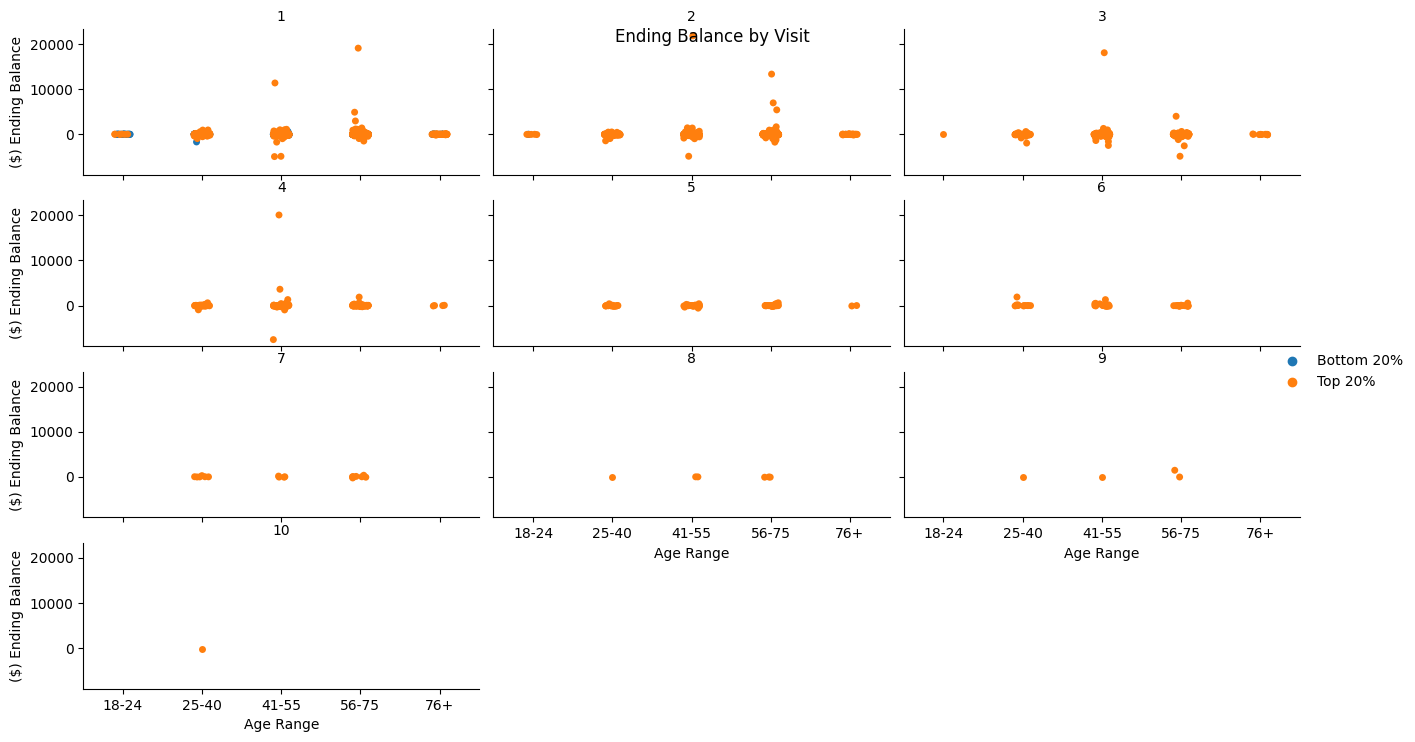

In [30]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


##### Overall Gains/Loses

In [31]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -5522.000000
        Top 20%       -3878.906250
M       Bottom 20%    -4079.210449
        Top 20%       71752.343750
Name: ending_balance, dtype: float32
-------------------------------------------------------
session_time  gender  percentile
1             F       Bottom 20%    -5230.730957
                      Top 20%        -456.162109
              M       Bottom 20%    -3634.819580
                      Top 20%       28039.996094
2             F       Bottom 20%     -291.268616
                      Top 20%       -1528.562256
              M       Bottom 20%     -444.390808
                      Top 20%       26749.142578
3             F       Top 20%       -5760.690918
              M       Top 20%        2244.454102
4             F       Top 20%        2231.877197
              M       Top 20%       12602.905273
5             F       Top 20%         193.547729
              M       Top 20%       -1382.815918
6     